In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## 数据解释

## About Dataset

### Context

This dataset contains 2021-2022 regular season NBA player stats per game.
Note that there are duplicate player names resulted from team changes.

### Content

+500 rows and 30 columns.
Columns' description are listed below.

```
Rk : Rank
Player : Player's name
Pos : Position
Age : Player's age
Tm : Team
G : Games played
GS : Games started
MP : Minutes played per game
FG : Field goals per game
FGA : Field goal attempts per game
FG% : Field goal percentage
3P : 3-point field goals per game
3PA : 3-point field goal attempts per game
3P% : 3-point field goal percentage
2P : 2-point field goals per game
2PA : 2-point field goal attempts per game
2P% : 2-point field goal percentage
eFG% : Effective field goal percentage
FT : Free throws per game
FTA : Free throw attempts per game
FT% : Free throw percentage
ORB : Offensive rebounds per game
DRB : Defensive rebounds per game
TRB : Total rebounds per game
AST : Assists per game
STL : Steals per game
BLK : Blocks per game
TOV : Turnovers per game
PF : Personal fouls per game
PTS : Points per game
```

# 季后赛

## 读取数据

In [5]:
csv_path = 'archive/2021-2022 NBA Player Stats - Playoffs.csv'

In [11]:
df = pd.read_csv(csv_path, delimiter=';')
df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [13]:
df.shape

(217, 30)

## 分析数据

### 不同位置球员分别有多少

In [16]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4


In [23]:
df2 = df.pivot_table(index='Pos', aggfunc='count', values=['Player'])
df2

,Player
Pos,
C,40
PF,50
PG,39
SF,39
SG,49


In [24]:
df2['Player'].sum()

217

### 不同球队位置球员分别有多少

In [26]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4


#### 多级索引

In [27]:
df.pivot_table(index=['Tm', 'Pos'], values='Player', aggfunc=['count'])

count
        Player
Tm  Pos       
ATL C        3
    PF       3
    PG       1
    SF       3
    SG       4
...        ...
UTA C        2
    PF       3
    PG       1
    SF       2
    SG       4

[78 rows x 1 columns]

#### 索引为球队，列为位置

In [50]:
df.pivot_table(index=['Tm'], columns=['Pos'], values='Player', aggfunc=['count'], fill_value=0)

count            
Pos     C PF PG SF SG
Tm                   
ATL     3  3  1  3  4
BOS     4  3  1  4  3
BRK     2  3  3  2  2
CHI     2  4  1  3  2
DAL     2  4  5  1  2
DEN     3  4  3  0  3
GSW     2  2  2  4  4
MEM     1  4  2  3  3
MIA     3  2  2  4  3
MIL     2  2  3  3  5
MIN     3  3  3  0  4
NOP     3  2  2  3  2
PHI     3  4  2  1  5
PHO     3  3  4  2  2
TOR     2  4  4  4  1
UTA     2  3  1  2  4

#### 索引为位置，列为球队

In [60]:
pos_of_team = df.pivot_table(index=['Pos'], columns=['Tm'], values='Player', aggfunc='count', fill_value=0)
pos_of_team

Tm,ATL,BOS,BRK,CHI,DAL,DEN,GSW,MEM,MIA,MIL,MIN,NOP,PHI,PHO,TOR,UTA
Pos,,,,,,,,,,,,,,,,
C,3,4,2,2,2,3,2,1,3,2,3,3,3,3,2,2
PF,3,3,3,4,4,4,2,4,2,2,3,2,4,3,4,3
PG,1,1,3,1,5,3,2,2,2,3,3,2,2,4,4,1
SF,3,4,2,3,1,0,4,3,4,3,0,3,1,2,4,2
SG,4,3,2,2,2,3,4,3,3,5,4,2,5,2,1,4


#### 查看按位置球员人数最多的球队

In [61]:
pos_of_team.idxmax(axis=1)

Pos
C     BOS
PF    CHI
PG    DAL
SF    BOS
SG    MIL
dtype: object

In [62]:
pos_of_team.idxmax()

Tm
ATL    SG
BOS     C
BRK    PF
CHI    PF
DAL    PG
DEN    PF
GSW    SF
MEM    PF
MIA    SF
MIL    SG
MIN    SG
NOP     C
PHI    SG
PHO    PG
TOR    PF
UTA    SG
dtype: object

### 关于年龄

In [83]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4


#### 查看各年龄球员分布

In [90]:
player_ages = df.pivot_table(index='Age', values='Player', aggfunc='count')
player_ages

,Player
Age,
19,3
20,7
21,12
22,19
23,18
24,21
25,20
26,17
27,15


In [98]:
player_ages.reset_index()['Age'].describe()

count    19.000000
mean     28.052632
std       5.720079
min      19.000000
25%      23.500000
50%      28.000000
75%      32.500000
max      38.000000
Name: Age, dtype: float64

In [92]:
player_ages.describe()

,Player
count,19.000000
mean,11.421053
std,6.543154
min,1.000000
25%,7.000000
50%,11.000000
75%,17.500000
max,21.000000


<AxesSubplot:xlabel='Age'>

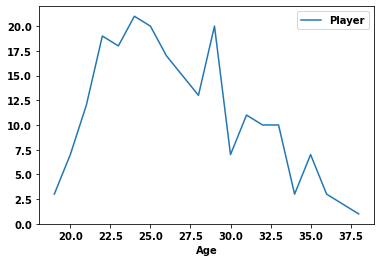

In [91]:
player_ages.plot()

#### 查看球员人数最多的年龄

In [104]:
player_ages.head(2)

,Player
Age,
19,3
20,7


In [138]:
# 获取球员人数最多的行标签
idx = player_ages.idxmax()[0]
idx

24

In [143]:
# 获取球员人数最多的具体人数
player_ages.loc[idx, 'Player']

21

In [137]:
idx['Player']

24

In [141]:
player_ages.iloc[player_ages.index.get_loc(idx), 0]

21

In [144]:
player_ages.query('Age == @idx')

,Player
Age,
24,21


In [145]:
player_ages.query(f'Age == {idx}')

,Player
Age,
24,21


### 从球队角度

### 先看各队人数

In [146]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4


In [147]:
df.shape

(217, 30)

In [149]:
teams = df.pivot_table(index='Tm', values='Player', aggfunc='count')
teams

,Player
Tm,
ATL,14
BOS,15
BRK,12
CHI,12
DAL,14
DEN,13
GSW,14
MEM,13
MIA,14


In [151]:
teams.sort_values('Player', ascending=False)

,Player
Tm,
BOS,15
MIL,15
PHI,15
TOR,15
ATL,14
DAL,14
GSW,14
MIA,14
PHO,14


In [153]:
teams.idxmax()[0]

'BOS'

In [154]:
teams.idxmin()[0]

'BRK'

### 关于比分

In [63]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4


#### 各球员总分

In [77]:
index = df['PTS'].idxmax()
df.loc[index, 'Player']

'Giannis Antetokounmpo'

In [81]:
indexes = df['PTS'].nlargest(5).index
indexes

Int64Index([7, 62, 109, 39, 57], dtype='int64')

In [82]:
df.loc[indexes, ['Player']]

,Player
7,Giannis Antetokounmpo
62,Luka Don?i?
109,Nikola Joki?
39,Jimmy Butler
57,Stephen Curry


In [ ]:
df 

In [78]:
df.loc[index, 'PTS']

31.7

In [74]:
df.pivot_table(index='Player', values='PTS')

,PTS
Player,
Aaron Gordon,13.8
Aaron Holiday,3.5
Aaron Nesmith,0.8
Al Horford,12.0
Alex Caruso,6.3
...,...
Xavier Tillman Sr.,4.4
Yuta Watanabe,1.0
Zach LaVine,19.3


#### 所有球员平均分、最高分及最低分

In [ ]:
df.pivot_table(index='Player', columns='PTS', )